<!-- # Assignment 1 Scientific Computing  -->

## Imports

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import numba 
from matplotlib.animation import FuncAnimation
import os
import pickle as pkl
from IPython.display import HTML


In [15]:
import src.solutions as solutions
import src.visualizations as visualizations


In [16]:
colors = ["orange", "blue", "green", "purple", "brown"]

## Waves

The discretized wave equation becomes (with functions from solutions): 

### Initial values for discretized wave function
Euler's method: f_x+1 = f_x + h * f'_x

(c*delta t)/delta x < 1 for stable computation 
looking at this method, you can derive that in the first two time-points, the function follows the exact same curve as the derivative (f'_x) is 0

### Plotted snapshots of the wave at different times

In [ ]:
L = 1
N = 100
c = 1
deltat= 0.001
iterations = 30000
overall_solutions=[]
for i in range(3):
    overall_solution, xs = solutions.one_b_wrapper(i+1, L, N, c, deltat, iterations)
    overall_solutions.append(overall_solution)

visualizations.visualization_1b(overall_solutions, xs)

### Wave Animation 

In [ ]:
visualizations.animate_1c(L, N, c, deltat)

The equations for the boundaries:

c^(k+1)_(0, j) = 1 -> top row <br>
c^(k+1)_(N-1, j) = 0 -> bottom row <br>
c^(k+1)_(i, 0) = c^(k+1)_(i, N - 2) -> first column <br>
c^(k+1)_(i, -1) = c^(k+1)_(i, 1) -> last column <br>

## Diffusion

In [4]:
# values used for initial diffusion setup 
# main parameter values (for discretization)
N = 100
L = 1.0
D = 1

# setp sizes
dx = L / N
dt = 0.25 * dx**2

# initial setup
gamma = (D * dt) / (dx**2) #what is this gamma
num_steps = int(1.0/ dt)
y_values = np.linspace(0, 1, N)
c = solutions.initialize_grid(N)

par_values = (c, num_steps, N, gamma, dt)

#### Comparison analytical with numerical solution

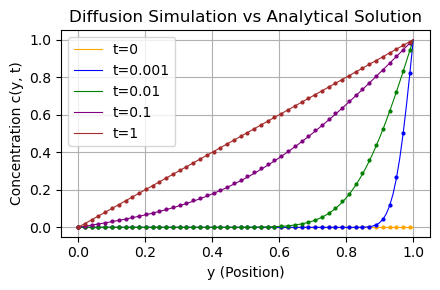

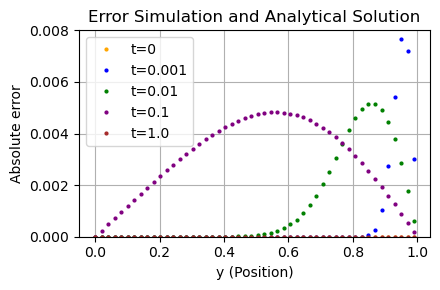

/Users/bartkoedijk/Bestanden/Scientific Computing/Scientific_Computing_1/src/visualizations.py:240: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.93, 1])


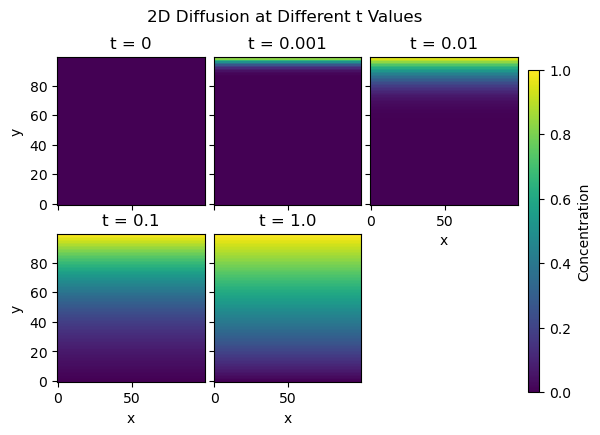

In [5]:

# parse data and check directory layout and file existence or create new data
create_new_data = False
data_file = "2D_diffusion.pkl"
all_c, times = solutions.check_and_parse_data(data_file, create_new_data, par_values)

# visualize the data together with analytical solution. 
# visualizations.plot_analytical_solution(y_values, all_c, times, D)
visualizations.plot_analytical_solution_with_error(y_values, all_c, times, D)
# t values 0, 0.001, 0.01, 0.1, 1.0
visualizations.plot_five_states(all_c, times)

### Snapshot of 5 Diffusion configurations 

In [ ]:

# data parsing/generation 
data_file = "2D_diffusion_comparison.pkl"
create_new_data = False
all_c, times = solutions.check_and_parse_data(data_file, create_new_data, par_values)

# visualizations.plot_simulation_without_animation(all_c, N)

# animation 
%matplotlib inline
anim = visualizations.animate_2f(solutions.update, c, num_steps, N, gamma, dt)
HTML(anim.to_jshtml())

I

Show how the convergence measure δ in eq. (14) depends on the number
 of iterations k for each of the methods. A log-lin plot may be suitable. For SOR,
 choose a few representative values for ω.

In [4]:
# parameters
p_values = np.arange(0, 11)
omegas = [1.75, 1.95]
N = 50
max_iters = 10000
omega_range = np.arange(1.7, 2.0, 0.05)
omega_range = np.round(omega_range, 2)
N_values = [10, 20, 50, 100]


In [ ]:
iterations_jacobi = [solutions.sequential_jacobi(N=N, tol=10.0**-p, max_iters=max_iters) for p in p_values]

iterations_gauss_seidel = [solutions.sequential_gauss_seidel(N=N, tol=10.0**-p, max_iters=max_iters) for p in p_values]

iterations_sor = {omega: [solutions.sequential_SOR(N=N, tol=10.0**-p, max_iters=max_iters, omega=omega) for p in p_values] for omega in omegas}

visualizations.visualization_1i(p_values, iterations_jacobi, iterations_gauss_seidel, iterations_sor, colors=colors)

J 

In the SOR method, find the optimal ω. How does it depend on N?.

In [ ]:
# parameters
omega_range = np.arange(1.7, 2.0, 0.05)
N_values = [10, 20, 50, 100]
max_iters = 10000 # delete this later (also already above)


optimal_omegas = []
iters_N = {}

for N in N_values:
    best_omega = None
    min_iters = float('inf')

    iters_omega = []

    for omega in omega_range:
        iters = solutions.sequential_SOR(N=N, tol=1e-6, max_iters=max_iters, omega=omega)

        iters_omega.append(iters)

        if iters < min_iters:
            min_iters = iters
            best_omega = omega

    optimal_omegas.append(best_omega)
    iters_N[N] = iters_omega

visualizations.visualization_1j_omega_iters(iters_N, omega_range, colors=colors)
visualizations.visualization_1j_N_omegas(N_values, optimal_omegas, colors=colors)

### K: Objects

#### Define Parameters and Create Object Grids

In [8]:
# parameters for experimentation 
max_iters = 10000 #after this we stop trying to converge

omega_range = np.arange(1.7, 2.0, 0.05)
omega_range = np.round(omega_range, 2)
omega_range_c = np.delete(omega_range, -1) #omegas for experimentation 

N_values = [10, 20, 50, 100] #experimental vlaues for grid size
omegatje= 1.9 #optimal omega for grid size 50X50
tol = 1e-6 #default tol
PROCESSES = 10  #number of processes for parallelization 
N=50 #default grid size
num_grids = 10 # number of object grids with the same configuration are created (as they're placed randomly multiple runs are needed)


In [ ]:

# different object configurations (note that the covered surface for the first 3 configs is the same)
object_configs = [
    (3, 8),   # 3 objects of size 8x8
    (48, 2),  # 48 objects of size 2x2
    (12, 4),  # 12 objects of size 4x4
    (6, 4)   # 6 objects of size 4x4
]


# naming of the object configurations run with SOR
sizes = [
        "3 of 8×8",
        "48 of 2×2",
        "12 of 4×4",
        "6 of 4×4", 
        "0 of 0x0"
    ]

# Saving all grids in a dictionary. 
all_grids = dict()
for ntje in N_values:
    # skip if N is smaller than 20, than the objects are too big in contrast to the gridsizes
    if ntje <20:
        continue

    # objects (following configuration) are randomly placed on the grid
    object_grids = solutions.create_object_layouts(ntje, object_configs, num_grids)
    all_grids[ntje] = object_grids
    # take an examplatory grid to visualize

# Visualization of 50x50 grid with all object configurations 
visualizations.visualize_object_grid(all_grids[50], sizes)


#### Apply SOR on different grids for all object configuraitons (parallelized over different runs)

In [ ]:
# get the mean, variance of every grid size for every object configuration 
# null metric is for grid without any objects
all_results, null_metric = solutions.generate_grid_results(N_values, N, all_grids, num_grids, max_iters, omegatje, tol, object_configs, "N", PROCESSES)

#### Apply SOR on different omega values for all object configuraitons (parallelized over different runs)


In [ ]:
# get the mean, variance of every omega for every object configuration
# null metric is for grid without any objects
all_results_omega, null_metric_omega = solutions.generate_grid_results(omega_range_c, N, all_grids, num_grids, max_iters, omegatje, tol, object_configs, "O", PROCESSES)

#### Visualize results for different grid sizes and omega values for all object configurations

In [ ]:
visualizations.vis_object_per_gridsize(all_results, all_results_omega, null_metric, null_metric_omega, object_configs, sizes, colors)

#### Statistical Testing for every object configuration

In [ ]:
solutions.statistical_test_for_objects(object_configs, all_results_omega)
solutions.statistical_test_for_objects(object_configs, all_results, "N")